![bees](./bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [1]:
import pandas as pd
data = pd.read_csv("../data/plants_and_bees.csv")
data

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


# Report

Questions
1. Which plants are preferred by native vs non-native bee species?
1. A visualization of the distribution of bee and plant species across one of the samples.
1. Select the top three plant species you would recommend to the agency to support native bees.

## Verify data

Before we start answering specific questions, let's just check the datatypes of the columns and the overall state of the data is suitable for analysis.

In [2]:
## examine the data types
data.dtypes

sample_id           int64
species_num         int64
date               object
season             object
site               object
native_or_non      object
sampling           object
plant_species      object
time                int64
bee_species        object
sex                object
specialized_on     object
parasitic         float64
nesting            object
status             object
nonnative_bee     float64
dtype: object

In [3]:
# check for n/a in data
data.isna().sum()

sample_id            0
species_num          0
date                 0
season               0
site                 0
native_or_non        0
sampling             0
plant_species        0
time                 0
bee_species          0
sex                  0
specialized_on    1243
parasitic           63
nesting             54
status            1235
nonnative_bee       61
dtype: int64

There are quite a few things here that are objects when they should be date, categories, booleans etc. Let's run through and correct them, making sure to cater for n/a.

In [4]:
import numpy as np

# convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# convert season, site, columns, sampling, sex to category
data['season'] = data['season'].astype('category')
data['site'] = data['site'].astype('category')
data['sampling'] = data['sampling'].astype('category')
data['sex'] = data['sex'].astype('category')

# convert native_or_non from string to boolean, with a better name
data['native_plant'] = data['native_or_non'].map({'native': True, 'non-native': False})
# drop the original native_or_non column
data = data.drop('native_or_non', axis=1)

# convert following to string, replacing None with np.nan in plant_species, as 
# None represents bees sampled from the air and isn't relevant for this study 
data['plant_species'] = data['plant_species'].replace('None', np.nan).astype('string')
data['bee_species'] = data['bee_species'].astype('string')
data['specialized_on'] = data['specialized_on'].astype('string')

# let's verify the data types
data.dtypes

sample_id                  int64
species_num                int64
date              datetime64[ns]
season                  category
site                    category
sampling                category
plant_species             string
time                       int64
bee_species               string
sex                     category
specialized_on            string
parasitic                float64
nesting                   object
status                    object
nonnative_bee            float64
native_plant                bool
dtype: object

## Which plants are preferred by native vs non-native bee species?

First let's explore the data by looking at the amount of plant species observations per for native and non-native bees

In [5]:
# show plant_species for non_native_bee values of 1 and 0
display(data[data['nonnative_bee'] == 1]['plant_species'].value_counts())
display(data[data['nonnative_bee'] == 0]['plant_species'].value_counts())


Trifolium incarnatum    1
Daucus carota           1
Name: plant_species, dtype: Int64

Leucanthemum vulgare        102
Rudbeckia hirta              51
Daucus carota                31
Cichorium intybus            25
Chamaecrista fasciculata     23
Trifolium pratense           21
Helenium flexuosum           19
Melilotus officinalis        16
Penstemon digitalis          15
Asclepias tuberosa           13
Rudbeckia triloba            12
Coronilla varia              12
Monarda punctata             10
Cosmos bipinnatus             9
Trifolium repens              6
Lobularia maritima            5
Agastache foeniculum          5
Pycnanthemum tenuifolium      4
Tradescantia virginiana       3
Lotus corniculatus            3
Viola cornuta                 3
Origanum vulgare              2
Trifolium incarnatum          2
Name: plant_species, dtype: Int64

The small sample size (33 samples, with only 2 identified plants) for non-native bees makes this data not suitable to answer the question of which plants non-native bees prefer.

We can draw a chart of the top plants native bees prefer.

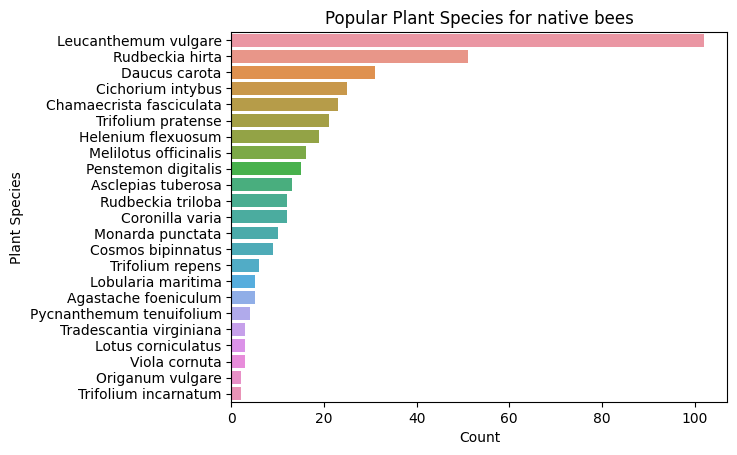

In [6]:
import seaborn as sns

chart = sns.countplot(
    data=data[data['nonnative_bee'] == 0], 
    y='plant_species', 
    order=data[data['nonnative_bee'] == 0]['plant_species'].value_counts().index
    )
labels = chart.set(
    xlabel="Count",
    ylabel="Plant Species",
    title="Popular Plant Species for native bees"
)

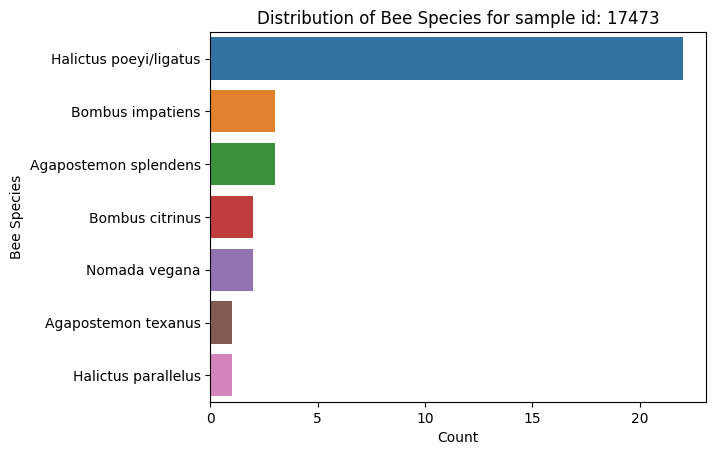

In [7]:
import matplotlib.pyplot as plt

## Visualisation of the distribution of bee and plant species across one of the samples

# first count the sample_id with the most occurences where plant_species is not None
sample_highest_count = data[data['plant_species'].notnull()]['sample_id'].value_counts().head(1)
# get the actual sample_id from the sample__highest_count
sample_id = sample_highest_count.index[0]

# filter the data to only include the sample_id with the highest count
sample_data = data[data['sample_id'] == sample_id]

bee_chart = sns.countplot(
data=sample_data, 
    y='bee_species',
    order=sample_data['bee_species'].value_counts().index   
)
labels = bee_chart.set(
    xlabel="Count",
    ylabel="Bee Species",
    title="Distribution of Bee Species for sample id: " + str(sample_id)
)

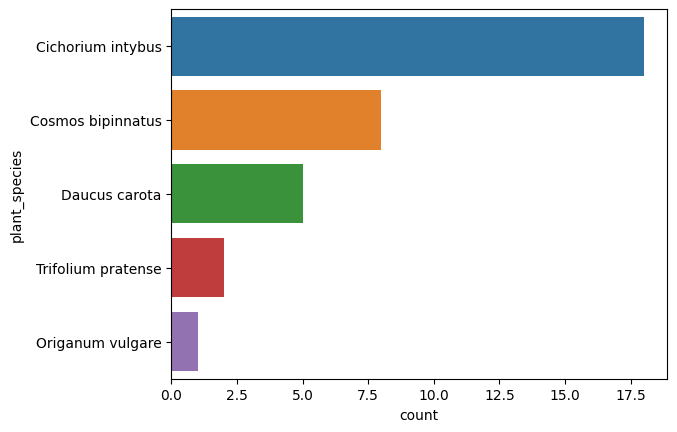

In [8]:
plant_chart = sns.countplot(
data=sample_data, 
    y='plant_species',
    order=sample_data['plant_species'].value_counts().index   
)
labels = plant_chart.set(
    xlabel="Count",
    ylabel="Plant Species",
    title="Distribution of Plant Species for sample id: " + str(sample_id)
)